## 1) Dataset Preparation

In [1]:
# Tokenization of paragraphs/sentences
import re
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/shri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load Dataset

In [2]:
patient_conversations = pd.read_csv('/home/shri/Downloads/NLP/ZS-DATA_NLP_CLASSIFICATION/dataset/train.csv',header=0,encoding = 'unicode_escape')
patient_conversations.head(5)

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag
0,FORUMS,cafepharma.com,http://cafepharma.com/boards/threads/epstein.5...,6/15/2016,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0
1,FORUMS,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,5/7/2016,0.820833333,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1
2,BLOG,http://abcnewsradioonline.com/entertainment-news,http://abcnewsradioonline.com/entertainment-ne...,4/14/2016,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0
3,FORUMS,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,6/18/2016,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1
4,FORUMS,www.diyaudio.com,http://www.diyaudio.com/forums/lounge/292252-d...,6/15/2016,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0


In [3]:
# Select only important variable (here, "TRANS_CONV_TEXT"  and "Patient_Tag") 
patient_conversations= patient_conversations[["TRANS_CONV_TEXT","Patient_Tag"]]
# Change the Variable Name (for simplicity)
patient_conversations.rename({'TRANS_CONV_TEXT': 'Text', 'Patient_Tag': 'Pat_Tag'}, axis=1, inplace=True)
patient_conversations.head(2)


,Text,Pat_Tag
0,I don't disagree with you in principle. I'm ju...,0
1,I am always dizzy I get dizzy standing up so I...,1


## 2 )  Feature Engineering 

###  Cleaning Dataset

In [4]:
y=patient_conversations["Pat_Tag"]
x=patient_conversations["Text"]
# Creating the corpus
Text = []
for i in range(len(x)):
    review = re.sub(r'\W', ' ', str(x[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    result = re.sub(r'\d+', ' ', review)
    
    Text.append(result)    


In [5]:
Text= pd.DataFrame(Text, columns = ['Text']) 
# Convert the cleaned dataset to the dataframe 
patient_conversations = pd.concat([Text, y], axis=1, sort=False)
patient_conversations.head(2)

,Text,Pat_Tag
0,i don disagree with you in principle m just sa...,0
1,i am always dizzy get dizzy standing up so hav...,1


#### Stopwords

In [6]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [7]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [8]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [9]:
patient_conversations['Text'] = patient_conversations['Text'].apply(stopwords)
patient_conversations.head(2)

,Text,Pat_Tag
0,disagree principle saying entresto major failu...,0
1,always dizzy get dizzy standing made get slow ...,1


## 2 ) TF-IDF Extraction

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# extract the tfid representation matrix of the text data
df_x=patient_conversations["Text"]  
df_y=patient_conversations["Pat_Tag"]
cv = TfidfVectorizer()   
#df_xcv = cv.fit_transform(df_x)  
tfid_matrix = cv.fit_transform(df_x)
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

In [11]:
# store the tf-idf array into pandas dataframe
df = pd.DataFrame(array)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22595,22596,22597,22598,22599,22600,22601,22602,22603,22604
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Adding the output to the dataframe

df['output'] = patient_conversations['Pat_Tag']
#df['id'] = data['id']
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22596,22597,22598,22599,22600,22601,22602,22603,22604,output
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [13]:
#### Tuning Multinomial Naive Bayes Classifier¶

In [14]:
features = df.columns.tolist()
output = 'output'
# removing the output and the id from features
features.remove(output)

In [15]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV

In [16]:
alpha_list1 = np.linspace(0.006, 0.1, 20)
alpha_list1 = np.around(alpha_list1, decimals=4)
alpha_list1

array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])

In [17]:
# parameter grid
parameter_grid = [{"alpha":alpha_list1}]

In [18]:
# classifier object
classifier1 = MultinomialNB()
# gridsearch object using 4 fold cross validation and neg_log_loss as scoring paramter
gridsearch1 = GridSearchCV(classifier1,parameter_grid, scoring = 'neg_log_loss', cv = 4)
# fit the gridsearch
gridsearch1.fit(df[features], df[output])

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [19]:
results1 = pd.DataFrame()
# collect alpha list
results1['alpha'] = gridsearch1.cv_results_['param_alpha'].data
# collect test scores
results1['neglogloss'] = gridsearch1.cv_results_['mean_test_score'].data

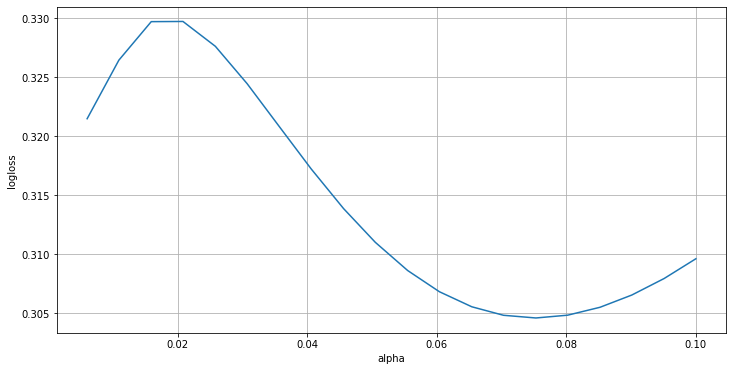

In [21]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(results1['alpha'], -results1['neglogloss'])
plt.xlabel('alpha')
plt.ylabel('logloss')
plt.grid()

In [22]:
print("Best parameter: ",gridsearch1.best_params_)

Best parameter:  {'alpha': 0.0753}


In [23]:
print("Best score: ",gridsearch1.best_score_) 

Best score:  -0.3046008850133003


In [24]:
alpha_list2 = np.linspace(0.006, 0.1, 20)
alpha_list2 = np.around(alpha_list2, decimals=4)
alpha_list2

array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])

In [25]:
parameter_grid = [{"alpha":alpha_list2}]

In [26]:
# classifier object
classifier2 = MultinomialNB()
# gridsearch object using 4 fold cross validation and neg_log_loss as scoring paramter
gridsearch2 = GridSearchCV(classifier2,parameter_grid, scoring = 'neg_log_loss', cv = 4)
# fit the gridsearch
gridsearch2.fit(df[features], df[output])

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [27]:
results2 = pd.DataFrame()
# collect alpha list
results2['alpha'] = gridsearch2.cv_results_['param_alpha'].data
# collect test scores
results2['neglogloss'] = gridsearch2.cv_results_['mean_test_score'].data

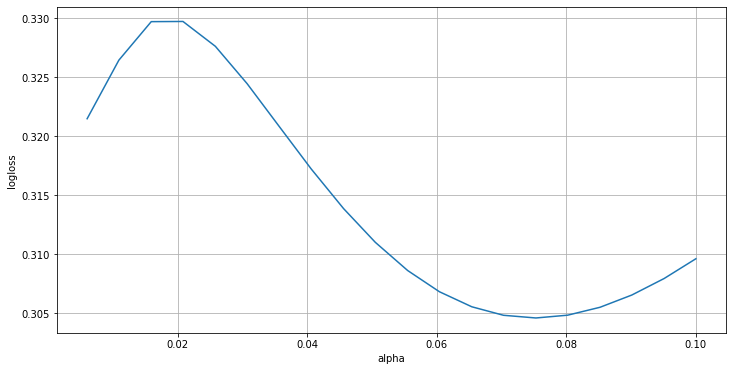

In [28]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(results2['alpha'], -results2['neglogloss'])
plt.xlabel('alpha')
plt.ylabel('logloss')
plt.grid()

In [29]:
print("Best parameter: ",gridsearch2.best_params_)


Best parameter:  {'alpha': 0.0753}


In [30]:
print("Best score: ",gridsearch2.best_score_)

Best score:  -0.3046008850133003


###  Train data 

In [31]:
df_x.head(3)

0    disagree principle saying entresto major failu...
1    always dizzy get dizzy standing made get slow ...
2    axelle bauer griffin filmmagic new york queen ...
Name: Text, dtype: object

#### Test data

In [32]:
y.head(3)

0    0
1    1
2    0
Name: Pat_Tag, dtype: int64

## Training Dataset

### Train-Test Split

In [33]:
from sklearn import model_selection, naive_bayes, svm
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_x,y,test_size=0.3)

In [34]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df_x)
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

### TF-IDF model Vocabularies

In [35]:
print(Tfidf_vect.vocabulary_)

{'principle': 3462, 'saying': 3932, 'entresto': 1514, 'major': 2678, 'failure': 1672, 'novartis': 3024, 'commercial': 875, 'totally': 4595, 'exposed': 1635, 'call': 624, 'issues': 2379, 'resolved': 3814, 'true': 4662, 'underlying': 4711, 'problem': 3472, 'failed': 1669, 'create': 1054, 'demand': 1186, 'drug': 1379, 'disease': 1303, 'awareness': 394, 'campaign': 633, 'us': 4750, 'drowning': 1377, 'man': 2689, 'incredibly': 2256, 'poor': 3370, 'fear': 1704, 'panic': 3185, 'wrong': 4974, 'condition': 930, 'raising': 3622, 'life': 2555, 'threatening': 4537, 'acute': 64, 'heart': 2052, 'instead': 2320, 'chronic': 787, 'indicated': 2264, 'nothing': 3020, 'treatment': 4639, 'due': 1384, 'shocking': 4060, 'lack': 2472, 'knowledge': 2458, 'area': 289, 'explained': 1631, 'conscious': 950, 'misleading': 2850, 'patients': 3226, 'managed': 2691, 'medical': 2766, 'community': 888, 'groups': 1989, 'top': 4590, 'including': 2246, 'principal': 3461, 'investigator': 2361, 'trials': 4647, 'publicly': 356

### TF-IDF dataset
##### 1: Row number of ‘Train_X_Tfidf’
##### 2: Unique Integer number of each word in the first row
##### 3: Score calculated by TF-IDF Vectorizer

In [36]:
print(Train_X_Tfidf)

  (0, 4984)	0.05582735130105248
  (0, 4964)	0.10464774343777763
  (0, 4952)	0.07665066564518606
  (0, 4937)	0.06680811236952787
  (0, 4753)	0.062332345322115
  (0, 4692)	0.09478892111581075
  (0, 4689)	0.07365889713976918
  (0, 4687)	0.05602408583308502
  (0, 4685)	0.09682239471953795
  (0, 4587)	0.15550526390701988
  (0, 4557)	0.04703173361482153
  (0, 4499)	0.0886855258155508
  (0, 4495)	0.38325332822593033
  (0, 4443)	0.057350668015882
  (0, 4300)	0.07921827981535141
  (0, 4204)	0.08146232577994302
  (0, 4097)	0.07692069523835192
  (0, 3669)	0.11504988129964266
  (0, 3627)	0.12342556176195286
  (0, 3604)	0.4410531601680745
  (0, 3549)	0.09544475301567
  (0, 3500)	0.08180377106990727
  (0, 3471)	0.08112643269259892
  (0, 3425)	0.11684727267975703
  (0, 3249)	0.04990920103382262
  :	:
  (808, 4135)	0.29944998113868004
  (808, 3441)	0.09473611611366767
  (808, 3094)	0.07141153754710791
  (808, 3012)	0.11430681433455452
  (808, 2883)	0.15177873755885712
  (808, 2854)	0.18894445113758596

### ML Algorithms to Predict the outcome

#### Naive Bayes

In [37]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
actual=Test_Y
predicted = predictions_NB

Naive Bayes Accuracy Score ->  78.44827586206897


In [38]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
results = confusion_matrix(actual, predicted)
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual,predicted))
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[269   0]
 [ 75   4]]
Accuracy Score : 0.7844827586206896
Report : 
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       269
           1       1.00      0.05      0.10        79

   micro avg       0.78      0.78      0.78       348
   macro avg       0.89      0.53      0.49       348
weighted avg       0.83      0.78      0.70       348



#### SVM 

In [39]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
actual=Test_Y
predicted = predictions_SVM

SVM Accuracy Score ->  87.06896551724138


In [40]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
results = confusion_matrix(actual, predicted)
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual,predicted))
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[264   5]
 [ 40  39]]
Accuracy Score : 0.8706896551724138
Report : 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       269
           1       0.89      0.49      0.63        79

   micro avg       0.87      0.87      0.87       348
   macro avg       0.88      0.74      0.78       348
weighted avg       0.87      0.87      0.86       348



In [41]:
df=patient_conversations

In [42]:
df.head(2)

,Text,Pat_Tag
0,disagree principle saying entresto major failu...,0
1,always dizzy get dizzy standing made get slow ...,1


In [43]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

train_size = int(len(df) * .7)
train_posts = df['Text'][:train_size]
train_tags = df['Pat_Tag'][:train_size]

test_posts = df['Text'][train_size:]
test_tags = df['Pat_Tag'][train_size:]

max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

batch_size = 32
epochs = 5

# Build the model
model = Sequential()
model.add(Dense(64, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 728 samples, validate on 81 samples
Epoch 1/5
728/728 [==============================] - 2s 3ms/step - loss: 0.5519 - acc: 0.7418 - val_loss: 0.5674 - val_acc: 0.7037
Epoch 2/5
728/728 [==============================] - 0s 103us/step - loss: 0.3766 - acc: 0.8365 - val_loss: 0.4252 - val_acc: 0.7654
Epoch 3/5
728/728 [==============================] - 0s 100us/step - loss: 0.2961 - acc: 0.9011 - val_loss: 0.3627 - val_acc: 0.7901
Epoch 4/5
728/728 [==============================] - 0s 107us/step - loss: 0.2323 - acc: 0.9286 - val_loss: 0.3180 - val_acc: 0.8148
Epoch 5/5
728/728 [==============================] - 0s 86us/step - loss: 0.1791 - acc: 0.9492 - val_loss: 0.2788 - val_acc: 0.9012


In [44]:
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

348/348 [==============================] - 0s 41us/step
Test accuracy: 0.8591954043541832


In [45]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


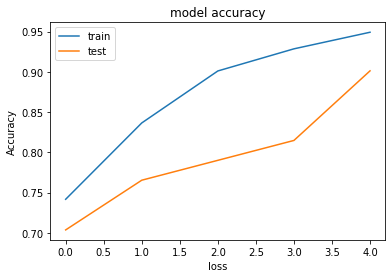

In [46]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

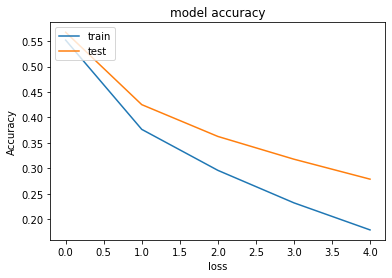

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()